In [30]:
!pip install scikit-learn
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]2m2/3 [folium]


In [1]:
import pandas as pd
import numpy as np

# 시군구 목록
sgg_list = ['창원시 의창구', '진주시', '통영시', '사천시', '김해시', '양산시']

# 카드매출 가상 데이터 (12개월치)
np.random.seed(42)
card_df = pd.DataFrame({
    '시군구명': np.repeat(sgg_list, 12),
    '20대매출': np.random.randint(10000, 200000, len(sgg_list)*12),
    '30대매출': np.random.randint(15000, 250000, len(sgg_list)*12),
    '60대이상매출': np.random.randint(5000, 180000, len(sgg_list)*12),
    '전체매출': np.random.randint(300000, 600000, len(sgg_list)*12),
    '야간매출': np.random.randint(10000, 100000, len(sgg_list)*12),
    '유입매출': np.random.randint(5000, 80000, len(sgg_list)*12),
    '소매식음료매출': np.random.randint(50000, 200000, len(sgg_list)*12)
})


In [2]:
# 시군구별 변수 집계
card_agg = card_df.groupby('시군구명').agg({
    '20대매출': 'sum',
    '30대매출': 'sum',
    '60대이상매출': 'sum',
    '전체매출': 'sum',
    '야간매출': 'sum',
    '유입매출': 'sum',
    '소매식음료매출': 'sum'
}).reset_index()

# 변수 계산
card_agg['청년매출비중'] = (card_agg['20대매출'] + card_agg['30대매출']) / card_agg['전체매출']
card_agg['고령매출비중'] = card_agg['60대이상매출'] / card_agg['전체매출']
card_agg['야간소비비중'] = card_agg['야간매출'] / card_agg['전체매출']
card_agg['유입소비비중'] = card_agg['유입매출'] / card_agg['전체매출']
card_agg['소매식음료비중'] = card_agg['소매식음료매출'] / card_agg['전체매출']

# 최종 카드매출 변수만 추출
card_features = card_agg[['시군구명', '청년매출비중', '고령매출비중', '야간소비비중', '유입소비비중', '소매식음료비중']]
card_features


,시군구명,청년매출비중,고령매출비중,야간소비비중,유입소비비중,소매식음료비중
0,김해시,0.574041,0.205037,0.106673,0.077002,0.283112
1,사천시,0.376038,0.246561,0.130008,0.123963,0.309386
2,양산시,0.552660,0.208301,0.108296,0.093070,0.218409
3,진주시,0.507344,0.276891,0.134037,0.103196,0.275008
4,창원시 의창구,0.513220,0.227404,0.117734,0.077073,0.248871
5,통영시,0.562913,0.198288,0.104271,0.106081,0.266588


In [3]:
pop_df = pd.DataFrame({
    '시군구명': sgg_list,
    'M20_34': np.random.randint(10000, 50000, len(sgg_list)),
    'F20_34': np.random.randint(10000, 50000, len(sgg_list)),
    'M60_75': np.random.randint(5000, 40000, len(sgg_list)),
    'F60_75': np.random.randint(5000, 40000, len(sgg_list)),
    '야간인구': np.random.randint(20000, 80000, len(sgg_list)),
    '주간인구': np.random.randint(30000, 90000, len(sgg_list)),
    '전체인구': np.random.randint(100000, 250000, len(sgg_list)),
    '변동성': np.random.rand(len(sgg_list)) * 0.2
})

# 인구 변수 계산
pop_df['청년비중'] = (pop_df['M20_34'] + pop_df['F20_34']) / pop_df['전체인구']
pop_df['고령비중'] = (pop_df['M60_75'] + pop_df['F60_75']) / pop_df['전체인구']
pop_df['야간비율'] = pop_df['야간인구'] / pop_df['주간인구']

# 최종 인구 변수만 추출
pop_features = pop_df[['시군구명', '청년비중', '고령비중', '야간비율', '전체인구', '변동성']]
pop_features


,시군구명,청년비중,고령비중,야간비율,전체인구,변동성
0,창원시 의창구,0.415190,0.135427,0.832396,218324,0.098884
1,진주시,0.378013,0.184927,0.777695,160566,0.011512
2,통영시,0.375967,0.304673,1.383045,127192,0.109906
3,사천시,0.696939,0.483495,0.413284,101062,0.088306
4,김해시,0.510925,0.081966,0.688913,184076,0.177541
5,양산시,0.238455,0.146480,0.795890,189780,0.070183


In [4]:
# 병합
merge_df = pd.merge(card_features, pop_features, on='시군구명')
merge_df


,시군구명,청년매출비중,고령매출비중,야간소비비중,유입소비비중,소매식음료비중,청년비중,고령비중,야간비율,전체인구,변동성
0,김해시,0.574041,0.205037,0.106673,0.077002,0.283112,0.510925,0.081966,0.688913,184076,0.177541
1,사천시,0.376038,0.246561,0.130008,0.123963,0.309386,0.696939,0.483495,0.413284,101062,0.088306
2,양산시,0.552660,0.208301,0.108296,0.093070,0.218409,0.238455,0.146480,0.795890,189780,0.070183
3,진주시,0.507344,0.276891,0.134037,0.103196,0.275008,0.378013,0.184927,0.777695,160566,0.011512
4,창원시 의창구,0.513220,0.227404,0.117734,0.077073,0.248871,0.415190,0.135427,0.832396,218324,0.098884
5,통영시,0.562913,0.198288,0.104271,0.106081,0.266588,0.375967,0.304673,1.383045,127192,0.109906


In [11]:
from sklearn.preprocessing import StandardScaler

# 분석에 사용할 피처만 추출 (시군구명 제외)
X = merge_df.drop(columns=['시군구명'])

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


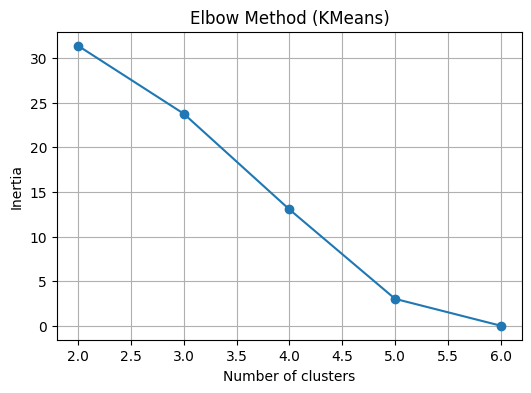

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
k_range = range(2, min(7, X_scaled.shape[0] + 1))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


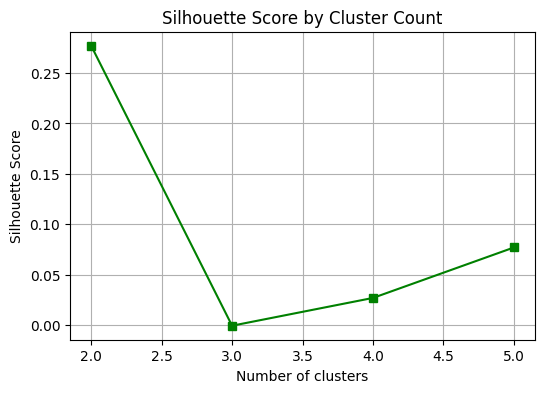

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, X_scaled.shape[0])

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score by Cluster Count')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# GMM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 클러스터 결과 비교
print("GMM 군집 수:", len(set(gmm_labels)))
print("DBSCAN 군집 수:", len(set(dbscan_labels)))


GMM 군집 수: 3
DBSCAN 군집 수: 1


In [17]:
from sklearn.cluster import KMeans

# 군집 수 선택
n_clusters = 3
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans_final.fit_predict(X_scaled)

# 병합
merge_df['cluster'] = labels
merge_df


,시군구명,청년매출비중,고령매출비중,야간소비비중,유입소비비중,소매식음료비중,청년비중,고령비중,야간비율,전체인구,변동성,cluster
0,김해시,0.574041,0.205037,0.106673,0.077002,0.283112,0.510925,0.081966,0.688913,184076,0.177541,2
1,사천시,0.376038,0.246561,0.130008,0.123963,0.309386,0.696939,0.483495,0.413284,101062,0.088306,1
2,양산시,0.552660,0.208301,0.108296,0.093070,0.218409,0.238455,0.146480,0.795890,189780,0.070183,0
3,진주시,0.507344,0.276891,0.134037,0.103196,0.275008,0.378013,0.184927,0.777695,160566,0.011512,0
4,창원시 의창구,0.513220,0.227404,0.117734,0.077073,0.248871,0.415190,0.135427,0.832396,218324,0.098884,0
5,통영시,0.562913,0.198288,0.104271,0.106081,0.266588,0.375967,0.304673,1.383045,127192,0.109906,0


In [18]:
# 시군구명 포함된 원래 피처 리스트
feature_cols = merge_df.columns.drop(['시군구명', 'cluster'])

# 군집별 평균
cluster_summary = merge_df.groupby('cluster')[feature_cols].mean().round(3)
cluster_summary


,청년매출비중,고령매출비중,야간소비비중,유입소비비중,소매식음료비중,청년비중,고령비중,야간비율,전체인구,변동성
cluster,,,,,,,,,,
0,0.534,0.228,0.116,0.095,0.252,0.352,0.193,0.947,173965.5,0.073
1,0.376,0.247,0.130,0.124,0.309,0.697,0.483,0.413,101062.0,0.088
2,0.574,0.205,0.107,0.077,0.283,0.511,0.082,0.689,184076.0,0.178


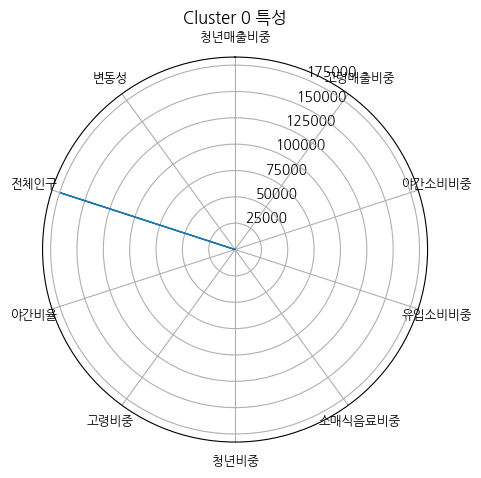

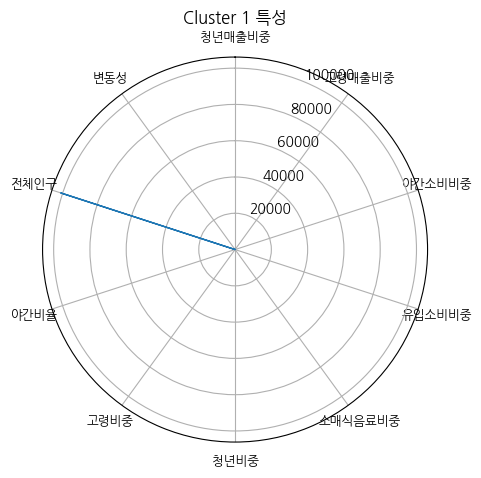

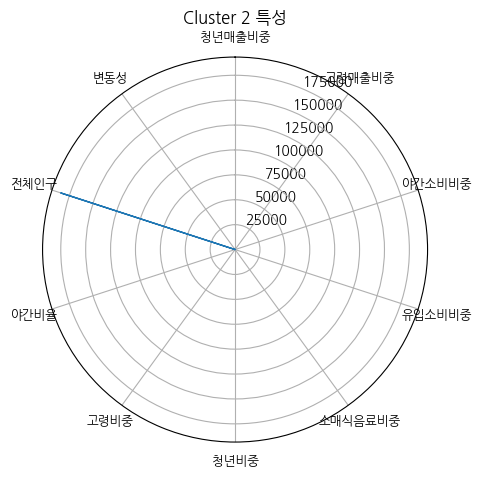

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import koreanize_matplotlib
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


# 차트 설정
categories = list(cluster_summary.columns)
N = len(categories)

# 각 군집 레이더차트
for cluster_id in cluster_summary.index:
    values = cluster_summary.loc[cluster_id].values.flatten().tolist()
    values += values[:1]  # 닫기용

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(5, 5))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, fontsize=9)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster_id}')
    ax.fill(angles, values, alpha=0.25)
    plt.title(f'Cluster {cluster_id} 특성')
    plt.show()


In [21]:
# 군집별 정책적 유형 매핑
label_map = {
    0: '상업 중심형',
    1: '고령화 혼재형',
    2: '청년 밀집형'
}

# 병합
merge_df['cluster_label'] = merge_df['cluster'].map(label_map)
merge_df[['시군구명', 'cluster', 'cluster_label']]


,시군구명,cluster,cluster_label
0,김해시,2,청년 밀집형
1,사천시,1,고령화 혼재형
2,양산시,0,상업 중심형
3,진주시,0,상업 중심형
4,창원시 의창구,0,상업 중심형
5,통영시,0,상업 중심형


In [22]:
for cid, label in label_map.items():
    print(f"▶ Cluster {cid} - {label}")
    cdata = cluster_summary.loc[cid]
    
    if cdata['청년비중'] > 0.6:
        print("  - 청년 인구 비중이 높고")
    if cdata['고령비중'] > 0.4:
        print("  - 고령 인구 비중도 높아 정책 혼합형")
    if cdata['야간소비비중'] > 0.11:
        print("  - 야간 소비 비중이 높아 유흥/상업 가능성 있음")
    if cdata['변동성'] > 0.15:
        print("  - 유동인구 변동성이 크므로 주거보다는 유입형 지역일 가능성")
    print()


▶ Cluster 0 - 상업 중심형
  - 야간 소비 비중이 높아 유흥/상업 가능성 있음

▶ Cluster 1 - 고령화 혼재형
  - 청년 인구 비중이 높고
  - 고령 인구 비중도 높아 정책 혼합형
  - 야간 소비 비중이 높아 유흥/상업 가능성 있음

▶ Cluster 2 - 청년 밀집형
  - 유동인구 변동성이 크므로 주거보다는 유입형 지역일 가능성



In [23]:
policy_suggestions = {
    '상업 중심형': [
        '상권 재생 및 관광 연계형 투자 확대',
        '야간 교통 인프라 정비',
        '소매·식음료 중심 정책지원'
    ],
    '고령화 혼재형': [
        '복지+청년 일자리 복합 정책 필요',
        '돌봄서비스와 스타트업 유치 균형',
        '거점 보건/문화시설 확대'
    ],
    '청년 밀집형': [
        '청년 창업 지원센터 확대',
        '주거안정 정책(공공기숙사 등)',
        '문화/예술형 야간 경제 활성화'
    ]
}

for label, policies in policy_suggestions.items():
    print(f"■ [{label}] 정책 제안:")
    for p in policies:
        print(f"   - {p}")
    print()


■ [상업 중심형] 정책 제안:
   - 상권 재생 및 관광 연계형 투자 확대
   - 야간 교통 인프라 정비
   - 소매·식음료 중심 정책지원

■ [고령화 혼재형] 정책 제안:
   - 복지+청년 일자리 복합 정책 필요
   - 돌봄서비스와 스타트업 유치 균형
   - 거점 보건/문화시설 확대

■ [청년 밀집형] 정책 제안:
   - 청년 창업 지원센터 확대
   - 주거안정 정책(공공기숙사 등)
   - 문화/예술형 야간 경제 활성화



In [25]:
def run_clustering_pipeline(df_card, df_pop, n_clusters=3):
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans

    # 병합
    merged = pd.merge(df_card, df_pop, on='시군구명')
    features = merged.drop(columns=['시군구명'])
    
    # 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    
    # KMeans 군집화
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    merged['cluster'] = labels
    return merged


In [27]:
# 예: 시군구 단위 GeoJSON과 merge하려는 경우
geo_merge_df = merge_df[['시군구명', 'cluster', 'cluster_label']]

# 시군구명 → 정제 (예: 띄어쓰기 제거 등 지도 데이터와 맞추기)
geo_merge_df.loc[:, '시군구명'] = geo_merge_df['시군구명'].str.replace(' ', '')
geo_merge_df


,시군구명,cluster,cluster_label
0,김해시,2,청년 밀집형
1,사천시,1,고령화 혼재형
2,양산시,0,상업 중심형
3,진주시,0,상업 중심형
4,창원시의창구,0,상업 중심형
5,통영시,0,상업 중심형


In [31]:
import folium
import json

# 경남 시군구 GeoJSON 불러오기
# (파일 필요 시 랩실에서 제공받아야 함)
with open('../data_raw/gyeongnam_sgg.geojson', encoding='utf-8') as f:
    geo_data = json.load(f)

# 중심 좌표
map_center = [35.3, 128.2]
m = folium.Map(location=map_center, zoom_start=9)

# 색상 맵핑 함수
folium.Choropleth(
    geo_data=geo_data,
    data=geo_merge_df,
    columns=['시군구명', 'cluster'],
    key_on='feature.properties.시군구명',  # GeoJSON 속성 이름에 따라 수정 필요
    fill_color='YlGnBu',
    legend_name='경제권 군집',
).add_to(m)

m


FileNotFoundError: [Errno 2] No such file or directory: '../data_raw/gyeongnam_sgg.geojson'